# Project_COVTYPE, Zachariah Gutierrez

## Dataset information

Name: CovType <br>
Data Type: Multivariate <br>
Default Task: Classification <br>
Attribute Types: categorical, integer <br>
No. Instances: 581012 <br>
No. Attributes: 54 <br>
Year: 1998 <br>
Task: Predict forest cover type (1-7) from cartographic variables using SVM, KNN, and Random Forests

## Imports and functions

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)
    from sklearn.ensemble import RandomForestClassifier

In [3]:
# heatmap for LinearSVC
def draw_heatmap_linear(acc, acc_desc, C_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    plt.title(acc_desc + ' w.r.t $C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

# heatmap for K-NearestNeighbors
def draw_heatmap_knn(acc, acc_desc, k_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=k_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$k$')
    plt.title(acc_desc + ' w.r.t $k$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()
    
# heatmap for RandomForest
def draw_heatmap_rf(acc, acc_desc, p_list):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=p_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$params$')
    plt.title(acc_desc + ' w.r.t $params$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

## Load and transform the data

In [4]:
# import the data and set the column names
X_and_y = pd.read_csv('covtype.data', header=None)
X_and_y.rename(columns={54:'covertype'}, inplace=True)

print('Shape of original data is:', X_and_y.shape)

# shuffle the data then split X and y
X_and_y = X_and_y.sample(frac=1).reset_index(drop=True)
X = X_and_y.iloc[0:10000,0:54]
y = X_and_y.iloc[0:10000,-1]

Shape of original data is: (581012, 55)


In [5]:
# inspect the data
X_and_y.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,covertype
0,3159,99,14,120,9,2093,242,221,106,2144,...,0,0,0,0,0,0,0,0,0,1
1,2831,144,17,150,80,2070,242,234,115,816,...,0,0,0,0,0,0,0,0,0,5
2,2942,177,16,365,56,1682,226,247,148,1739,...,0,1,0,0,0,0,0,0,0,2
3,3218,61,12,313,35,5649,230,215,117,2187,...,0,0,0,0,0,0,0,0,0,1
4,3316,224,34,426,193,3152,155,247,209,3034,...,0,0,0,0,0,0,0,0,0,1


In [6]:
%%time

## "CovType has been converted to a binary problem
##  by treating the largest class (7) as the positive
##  and the rest (1-6) as negative."

for i in range(len(y)):
    if y[i] == 7:
        y[i] = 1
    else:
        y[i] = 0

CPU times: user 376 ms, sys: 6.81 ms, total: 382 ms
Wall time: 304 ms


In [7]:
# converts dataframes to np arrays
X = X.values    
y = y.values

In [8]:
# reshape y and change from object type
y = y.reshape(10000,)  # 100000 is a subset of orignal data
y = y.astype('int')     # changed this because of an error message

## Train the models (SVM, KNN, & RandomForest)

In [9]:
final_score_svm = []
final_score_knn = []
final_score_rf = []

### CovType 20/80

In [10]:
%%time

## Train every model on three random splits of 20/80

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on CovType.data, split=20/80...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,11))  # 11 for each value of C penalties
avg_test_acc_knn = np.zeros((1,26))  # 26 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,12))   # 12 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (20/80)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,27))         
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on CovType.data, split=20/80...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.96350014 0.96350014 0.96324999 0.85137514 0.96362514 0.96362522
 0.96362522 0.96362522 0.96325014 0.82358782 0.96150163]
The SVM testing accuracy is [0.9635 0.9635 0.963  0.8465 0.9635 0.9635 0.9635 0.9635 0.963  0.822
 0.9615]

The KNN training accuracy is [1.         0.97787554 0.97912499 0.97362562 0.97350077 0.97225046
 0.97187546 0.96950022 0.96975062 0.96587554 0.96675046 0.96437491
 0.96462507 0.96374999 0.96387491 0.96374999 0.96362491 0.96350014
 0.96387507 0.96362507 0.96374999 0.96350014 0.96350014 0.96350014
 0.96350014 0.96350014]
The KNN testing accuracy is [0.956  0.969  0.9665 0.967  0.9665 0.9665 0.9655 0.9655 0.966  0.9645
 0.964  0.9635 0.963  0.9625 0.9625 0.963  0.963  0.9635 0.9635 0.9635
 0.9635 0.9635 0.9635 0.9635 0.9635 0.9635]

The RF training accuracy is [0.

The avg test scores for 20/80:
SVM: 0.9437727272727273
KNN: 0.9664102564102564
RF: 0.9674305555555556


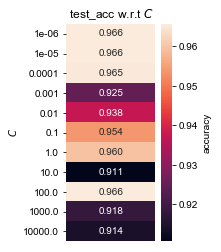

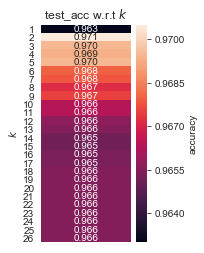

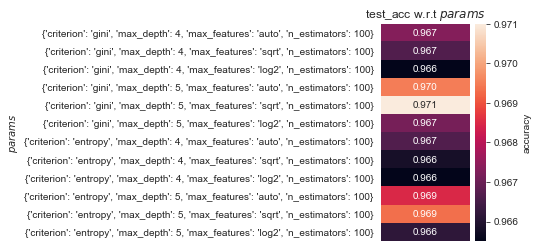

In [11]:
## Plot the heatmaps

print('The avg test scores for 20/80:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg2080 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(11,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(26,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(12,1), 'test_acc', params)

In [12]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on CovType is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on CovType is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for CovType are', R_prime)

Best C for SVM on CovType is: 100.0
Best K for KNN on CovType is: 5
Best RandomForest parameters for CovType are {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [13]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For CovType.data, 20/80 split...')
print('Test score for SVM on is:', test_score_svm)
print('Test score for KNN on is:', test_score_knn)
print('Test score for RF on is:', test_score_rf)

For CovType.data, 20/80 split...
Test score for SVM on is: 0.964375
Test score for KNN on is: 0.967875
Test score for RF on is: 0.972375


### CovType 50/50

In [14]:
%%time

## Train every model on three random splits of 50/50

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on CovType.data, split=50/50...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,11))  # 11 for each value of C penalties
avg_test_acc_knn = np.zeros((1,26))  # 26 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,12))   # 12 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (50/50)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,27))
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on CovType.data, split=50/50...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.96360002 0.96360002 0.96365006 0.95415235 0.96325006 0.96345002
 0.96365001 0.93785006 0.95090327 0.84662899 0.96350004]
The SVM testing accuracy is [0.9636 0.9636 0.9638 0.9542 0.9638 0.9638 0.9636 0.9382 0.9496 0.8428
 0.9634]

The KNN training accuracy is [1.         0.98315009 0.98345011 0.97794989 0.97904991 0.97414982
 0.9753999  0.97099977 0.97194981 0.96919971 0.96954976 0.96769986
 0.96769986 0.96664997 0.96684994 0.96629999 0.96659999 0.96575004
 0.96595006 0.96545002 0.96560001 0.96500004 0.96515007 0.96425002
 0.96425002 0.96399996]
The KNN testing accuracy is [0.9744 0.974  0.974  0.9728 0.9736 0.9704 0.9718 0.9688 0.9688 0.9678
 0.9678 0.9668 0.9668 0.966  0.9662 0.966  0.966  0.9656 0.966  0.9646
 0.9646 0.9644 0.9648 0.964  0.9638 0.964 ]

The RF training accuracy is [0

The avg test scores for 50/50:
SVM: 0.9382242424242424
KNN: 0.9682333333333334
RF: 0.966011111111111


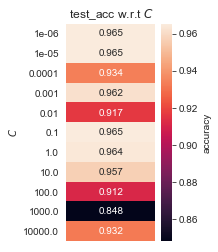

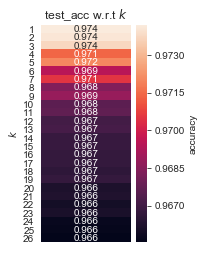

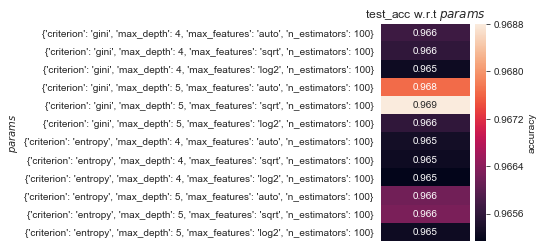

In [15]:
## Plot the heatmaps

print('The avg test scores for 50/50:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg5050 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(11,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(26,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(12,1), 'test_acc', params)

In [16]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on CovType is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on CovType is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for CovType are', R_prime)

Best C for SVM on CovType is: 0.0001
Best K for KNN on CovType is: 2
Best RandomForest parameters for CovType are {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


In [17]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For CovType.data, 50/50 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

For CovType.data, 50/50 split...
Test score for SVM is: 0.9602
Test score for KNN is: 0.9736
Test score for RF is: 0.9634


### CovType 80/20

In [18]:
%%time

## Train every model on three random splits of 80/20

## Note: The split is non-deterministic. Repeating three times with the
## same split will give you somewhat different subsets. This is why three
## trials are needed to reach a consistent conclusion by taking the average.

print('Training three classifiers using three trials on CovType.data, split=80/20...')
print('(Accuracy scores are listed with respect to their individual hyperparameters.)')

# initialize the accuracy lists
avg_test_acc_svm = np.zeros((1,11))  # 11 for each value of C penalties
avg_test_acc_knn = np.zeros((1,26))  # 26 for each value of K neighbors
avg_test_acc_rf = np.zeros((1,12))   # 12 for each parameter combo in RF

for i in range(3):   # run three trials
    
    print('\nFor trial #', i+1)
    
    # split data into training/testing (80/20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    
    # train SVM classifier
    C_list = [10e-7, 10e-6, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 10e0, 10e1, 10e2, 10e3]
    param_grid = {'C': C_list}
    clf = LinearSVC()
    SVM = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    SVM.fit(X_train, y_train)
    train_acc_svm = SVM.cv_results_['mean_train_score']
    test_acc_svm = SVM.cv_results_['mean_test_score']
    train_acc_svm = np.asarray(train_acc_svm)
    test_acc_svm = np.asarray(test_acc_svm)
    print('The SVM training accuracy is',train_acc_svm)
    print('The SVM testing accuracy is',test_acc_svm)
    avg_test_acc_svm = np.vstack((avg_test_acc_svm, test_acc_svm))
    
    # train KNN classifier
    K_list = list(range(1,27)) 
    param_grid = {'n_neighbors': K_list}
    clf = KNeighborsClassifier()
    KNN = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    KNN.fit(X_train, y_train)
    train_acc_knn = KNN.cv_results_['mean_train_score']
    test_acc_knn = KNN.cv_results_['mean_test_score']
    train_acc_knn = np.asarray(train_acc_knn)
    test_acc_knn = np.asarray(test_acc_knn)
    print('\nThe KNN training accuracy is',train_acc_knn)
    print('The KNN testing accuracy is',test_acc_knn)
    avg_test_acc_knn = np.vstack((avg_test_acc_knn, test_acc_knn))
    
    # train RandomForest classifier
    param_grid = {'n_estimators': [100], 'max_features': ['auto', 'sqrt', 'log2'],
                  'max_depth': [4,5], 'criterion':['gini', 'entropy']}
    clf = RandomForestClassifier()
    RF = GridSearchCV(clf, param_grid, cv=5, return_train_score = True)
    RF.fit(X_train, y_train)
    RFdf = pd.DataFrame.from_dict(data=RF.cv_results_)
    train_acc_rf = RF.cv_results_['mean_train_score']
    test_acc_rf = RF.cv_results_['mean_test_score']
    train_acc_rf = np.asarray(train_acc_rf)
    test_acc_rf = np.asarray(test_acc_rf)
    print('\nThe RF training accuracy is',train_acc_rf)
    print('The RF testing accuracy is',test_acc_rf)
    avg_test_acc_rf = np.vstack((avg_test_acc_rf, test_acc_rf))
    
# Begin displaying the testing accuracies.
print('\nReporting the average testing accuracies for all models...')

# Go through and delete first row of zeros (or else the avg suffers)
avg_test_acc_svm = np.delete(avg_test_acc_svm, 0, axis=0)
avg_test_acc_knn = np.delete(avg_test_acc_knn, 0, axis=0)
avg_test_acc_rf = np.delete(avg_test_acc_rf, 0, axis=0)

# SVM
avg_test_acc_svm = np.mean(avg_test_acc_svm, axis=0)
print('\nFor C =', C_list,'...')
print('The average test accuracy for SVM is', avg_test_acc_svm)

# KNN
avg_test_acc_knn = np.mean(avg_test_acc_knn, axis=0)
print('\nFor K =', K_list,'...')
print('The average test accuracy for KNN is', avg_test_acc_knn)

# RF
params = RFdf['params']
avg_test_acc_rf = np.mean(avg_test_acc_rf, axis=0)
print('\nFor the different parameters of Random Forest...')
print(params)
print('The average test accuracy is', avg_test_acc_rf)
print()

Training three classifiers using three trials on CovType.data, split=80/20...
(Accuracy scores are listed with respect to their individual hyperparameters.)

For trial # 1
The SVM training accuracy is [0.96412501 0.96446875 0.96493755 0.87074999 0.96443754 0.94546763
 0.96437503 0.9634061  0.96387496 0.96412499 0.8422359 ]
The SVM testing accuracy is [0.964125 0.964375 0.96475  0.87575  0.96325  0.947875 0.963625 0.964125
 0.9645   0.964375 0.846625]

The KNN training accuracy is [1.         0.98756251 0.98868746 0.98137491 0.98234367 0.97668746
 0.97746873 0.97349998 0.97431248 0.9718125  0.97231249 0.97087498
 0.97140622 0.97009377 0.97068749 0.96953124 0.96996872 0.96881251
 0.96912501 0.96803124 0.96837498 0.96731249 0.96778122 0.96684379
 0.96693754 0.96643753]
The KNN testing accuracy is [0.977125 0.975375 0.975875 0.972625 0.973875 0.96925  0.970375 0.969125
 0.96975  0.968875 0.969375 0.968375 0.968875 0.967875 0.969    0.96775
 0.968    0.96725  0.9675   0.966625 0.9675   0.96

The avg test scores for 80/20:
SVM: 0.9496931818181817
KNN: 0.9690544871794872
RF: 0.9650937500000002


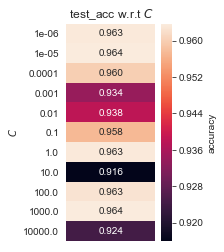

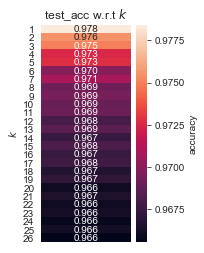

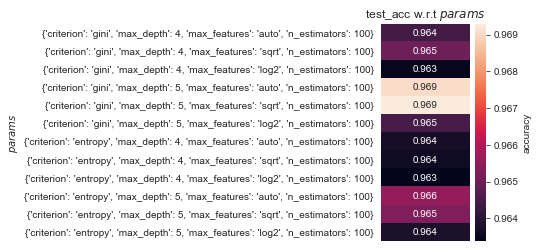

In [19]:
## Plot the heatmaps

print('The avg test scores for 80/20:')
print('SVM:', np.mean(avg_test_acc_svm))
print('KNN:', np.mean(avg_test_acc_knn))
print('RF:', np.mean(avg_test_acc_rf))
avg8020 = np.mean([np.mean(avg_test_acc_svm), np.mean(avg_test_acc_knn),
                   np.mean(avg_test_acc_rf)])

draw_heatmap_linear(avg_test_acc_svm.reshape(11,1), 'test_acc', C_list)
draw_heatmap_knn(avg_test_acc_knn.reshape(26,1), 'test_acc', K_list)
draw_heatmap_rf(avg_test_acc_rf.reshape(12,1), 'test_acc', params)

In [20]:
## Find the best hyperparameters

# SVM - best C
C_prime = SVM.best_params_['C']
print('Best C for SVM on CovType is:', C_prime)

# KNN - best K
K_prime = KNN.best_params_['n_neighbors']
print('Best K for KNN on CovType is:', K_prime)

# RF - best parameters
R_prime = RF.best_params_
print('Best RandomForest parameters for CovType are', R_prime)

Best C for SVM on CovType is: 1.0
Best K for KNN on CovType is: 1
Best RandomForest parameters for CovType are {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}


In [21]:
## Train the optimal classifiers using the best hyperparameters
## Display final test scores

# SVM
SVM_prime = LinearSVC(C=C_prime)
SVM_prime.fit(X_train, y_train)
test_score_svm = SVM_prime.score(X_test, y_test)
final_score_svm.append(test_score_svm)

# KNN
KNN_prime = KNeighborsClassifier(n_neighbors=K_prime)
KNN_prime.fit(X_train, y_train)
test_score_knn = KNN_prime.score(X_test, y_test)
final_score_knn.append(test_score_knn)

# RF
RF_prime = RandomForestClassifier(criterion=R_prime['criterion'], max_depth=R_prime['max_depth'], 
                                  max_features=R_prime['max_features'], n_estimators=R_prime['n_estimators'])
RF_prime.fit(X_train, y_train)
test_score_rf = RF_prime.score(X_test, y_test)
final_score_rf.append(test_score_rf)

print('For CovType.data, 80/20 split...')
print('Test score for SVM is:', test_score_svm)
print('Test score for KNN is:', test_score_knn)
print('Test score for RF is:', test_score_rf)

For CovType.data, 80/20 split...
Test score for SVM is: 0.97
Test score for KNN is: 0.9825
Test score for RF is: 0.9735


## Display the final results

0.9592045130795132 0.9574895622895623 0.9612804729992231


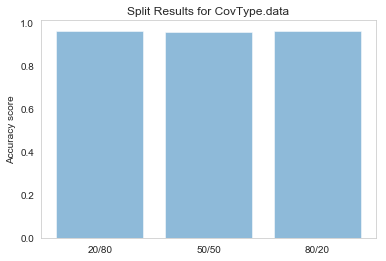

In [22]:
## Graph the individual split scores

print(avg2080, avg5050, avg8020)

objects = ('20/80', '50/50', '80/20')
y_pos = np.arange(len(objects))
performance = [avg2080, avg5050, avg8020]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Split Results for CovType.data')
plt.show()

In [23]:
## Calculate average test scores for all splits

print('For CovType.data, the final test scores are:')
print('SVM:', np.mean(final_score_svm))
print('KNN:', np.mean(final_score_knn))
print('RF:', np.mean(final_score_rf))

For CovType.data, the final test scores are:
SVM: 0.9648583333333333
KNN: 0.9746583333333333
RF: 0.9697583333333334


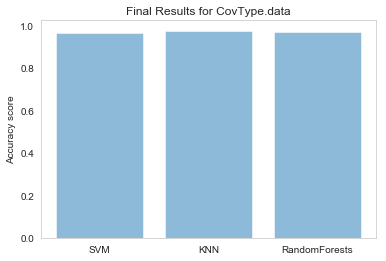

In [24]:
## Graph the final test scores

objects = ('SVM', 'KNN', 'RandomForests')
y_pos = np.arange(len(objects))
performance = [np.mean(final_score_svm), np.mean(final_score_knn), np.mean(final_score_rf)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy score')
plt.title('Final Results for CovType.data')
plt.show()

# End